# AFCON 2023 project

In [83]:
import pandas as pd
from string import ascii_uppercase as alphabet
import pickle
from bs4 import BeautifulSoup # to parse HTML or XML documents and extract data 
import requests # to aend requests to the website (wikipedia) that I am going to scrape

In [ ]:
xvvbc

# Scraping data from the internet relating to AFCON 2023/24

In [84]:
all_group_tables = pd.read_html('https://en.wikipedia.org/wiki/2023_Africa_Cup_of_Nations')

In [85]:
all_group_tables

[  Coupe d'Afrique des Nations 2023 Coupe d'Afrique des Nations 2023.1
 0                 Official logo[1]                   Official logo[1]
 1               Tournament details                 Tournament details
 2                     Host country                        Ivory Coast
 3                            Dates      13 January – 11 February 2024
 4                            Teams                                 24
 5                         Venue(s)               6 (in 5 host cities)
 6                    ← 2021 2025 →                      ← 2021 2025 →,
            Title sponsor            Official sponsors Regional sponsors
 0  Total 1XBET Visa Puma  Apsonic[15] Tecno[16] Razzl    Celeste Porteo
 1            Total 1XBET                    Visa Puma               NaN
 2  Apsonic[15] Tecno[16]                        Razzl               NaN,
              0          1
 0  Total 1XBET  Visa Puma,
                        0      1
 0  Apsonic[15] Tecno[16]  Razzl,
                

As can be seen, the Wikipedia page does not simply contain the AFCON groups/tables only.  There is other information that might not be relevant to me for this particular project.  I will show a few elements of the Wikipedia page in the cells below.

In [86]:
all_group_tables[0]

,Coupe d'Afrique des Nations 2023,Coupe d'Afrique des Nations 2023.1
0,Official logo[1],Official logo[1]
1,Tournament details,Tournament details
2,Host country,Ivory Coast
3,Dates,13 January – 11 February 2024
4,Teams,24
5,Venue(s),6 (in 5 host cities)
6,← 2021 2025 →,← 2021 2025 →


In [87]:
all_group_tables[12]

,Ivory Coast,v,Nigeria
0,NaN,NaN,NaN


In [88]:
all_group_tables[44]

,Morocco,v,Tanzania
0,NaN,NaN,NaN


By observing the orignal 'all_group_tables' data that I imported from Wikipedia, I notice that the specific group table relating to the fixture "Ivory Coast	v	Nigeria" thatI found in my random search **all_group_tables[12]** is a few elements before that fixture list.  I *guesstimate* that the group will be found in the 9th element of the page, as seen below.

In [89]:
all_group_tables[8]

,Pos,"Team.mw-parser-output .hlist dl,.mw-parser-output .hlist ol,.mw-parser-output .hlist ul{margin:0;padding:0}.mw-parser-output .hlist dd,.mw-parser-output .hlist dt,.mw-parser-output .hlist li{margin:0;display:inline}.mw-parser-output .hlist.inline,.mw-parser-output .hlist.inline dl,.mw-parser-output .hlist.inline ol,.mw-parser-output .hlist.inline ul,.mw-parser-output .hlist dl dl,.mw-parser-output .hlist dl ol,.mw-parser-output .hlist dl ul,.mw-parser-output .hlist ol dl,.mw-parser-output .hlist ol ol,.mw-parser-output .hlist ol ul,.mw-parser-output .hlist ul dl,.mw-parser-output .hlist ul ol,.mw-parser-output .hlist ul ul{display:inline}.mw-parser-output .hlist .mw-empty-li{display:none}.mw-parser-output .hlist dt::after{content:"": ""}.mw-parser-output .hlist dd::after,.mw-parser-output .hlist li::after{content:"" · "";font-weight:bold}.mw-parser-output .hlist dd:last-child::after,.mw-parser-output .hlist dt:last-child::after,.mw-parser-output .hlist li:last-child::after{content:none}.mw-parser-output .hlist dd dd:first-child::before,.mw-parser-output .hlist dd dt:first-child::before,.mw-parser-output .hlist dd li:first-child::before,.mw-parser-output .hlist dt dd:first-child::before,.mw-parser-output .hlist dt dt:first-child::before,.mw-parser-output .hlist dt li:first-child::before,.mw-parser-output .hlist li dd:first-child::before,.mw-parser-output .hlist li dt:first-child::before,.mw-parser-output .hlist li li:first-child::before{content:"" ("";font-weight:normal}.mw-parser-output .hlist dd dd:last-child::after,.mw-parser-output .hlist dd dt:last-child::after,.mw-parser-output .hlist dd li:last-child::after,.mw-parser-output .hlist dt dd:last-child::after,.mw-parser-output .hlist dt dt:last-child::after,.mw-parser-output .hlist dt li:last-child::after,.mw-parser-output .hlist li dd:last-child::after,.mw-parser-output .hlist li dt:last-child::after,.mw-parser-output .hlist li li:last-child::after{content:"")"";font-weight:normal}.mw-parser-output .hlist ol{counter-reset:listitem}.mw-parser-output .hlist ol>li{counter-increment:listitem}.mw-parser-output .hlist ol>li::before{content:"" ""counter(listitem)""\a0 ""}.mw-parser-output .hlist dd ol>li:first-child::before,.mw-parser-output .hlist dt ol>li:first-child::before,.mw-parser-output .hlist li ol>li:first-child::before{content:"" (""counter(listitem)""\a0 ""}.mw-parser-output .navbar{display:inline;font-size:88%;font-weight:normal}.mw-parser-output .navbar-collapse{float:left;text-align:left}.mw-parser-output .navbar-boxtext{word-spacing:0}.mw-parser-output .navbar ul{display:inline-block;white-space:nowrap;line-height:inherit}.mw-parser-output .navbar-brackets::before{margin-right:-0.125em;content:""[ ""}.mw-parser-output .navbar-brackets::after{margin-left:-0.125em;content:"" ]""}.mw-parser-output .navbar li{word-spacing:-0.125em}.mw-parser-output .navbar a>span,.mw-parser-output .navbar a>abbr{text-decoration:inherit}.mw-parser-output .navbar-mini abbr{font-variant:small-caps;border-bottom:none;text-decoration:none;cursor:inherit}.mw-parser-output .navbar-ct-full{font-size:114%;margin:0 7em}.mw-parser-output .navbar-ct-mini{font-size:114%;margin:0 4em}vte",Pld,W,D,L,GF,GA,GD,Pts,Qualification
0,1,Ivory Coast (H),0,0,0,0,0,0,0,0,Advance to knockout stage
1,2,Nigeria,0,0,0,0,0,0,0,0,Advance to knockout stage
2,3,Equatorial Guinea,0,0,0,0,0,0,0,0,Possible knockout stage based on ranking
3,4,Guinea-Bissau,0,0,0,0,0,0,0,0,NaN


The table above is the table for group A. Another *guesstimate* shows me that Group B is foundin the 16th element of our data. I will now test this for all the 6 groups.

In [90]:
all_group_tables[15]

,Pos,Teamvte,Pld,W,D,L,GF,GA,GD,Pts,Qualification
0,1,Egypt,0,0,0,0,0,0,0,0,Advance to knockout stage
1,2,Ghana,0,0,0,0,0,0,0,0,Advance to knockout stage
2,3,Cape Verde,0,0,0,0,0,0,0,0,Possible knockout stage based on ranking
3,4,Mozambique,0,0,0,0,0,0,0,0,NaN


In [91]:
all_group_tables[22]

,Pos,Teamvte,Pld,W,D,L,GF,GA,GD,Pts,Qualification
0,1,Senegal,0,0,0,0,0,0,0,0,Advance to knockout stage
1,2,Cameroon,0,0,0,0,0,0,0,0,Advance to knockout stage
2,3,Guinea,0,0,0,0,0,0,0,0,Possible knockout stage based on ranking
3,4,Gambia,0,0,0,0,0,0,0,0,NaN


In [92]:
all_group_tables[29]

,Pos,Teamvte,Pld,W,D,L,GF,GA,GD,Pts,Qualification
0,1,Algeria,0,0,0,0,0,0,0,0,Advance to knockout stage
1,2,Burkina Faso,0,0,0,0,0,0,0,0,Advance to knockout stage
2,3,Mauritania,0,0,0,0,0,0,0,0,Possible knockout stage based on ranking
3,4,Angola,0,0,0,0,0,0,0,0,NaN


In [93]:
all_group_tables[36]

,Pos,Teamvte,Pld,W,D,L,GF,GA,GD,Pts,Qualification
0,1,Tunisia,0,0,0,0,0,0,0,0,Advance to knockout stage
1,2,Mali,0,0,0,0,0,0,0,0,Advance to knockout stage
2,3,South Africa,0,0,0,0,0,0,0,0,Possible knockout stage based on ranking
3,4,Namibia,0,0,0,0,0,0,0,0,NaN


In [94]:
all_group_tables[43]

,Pos,Teamvte,Pld,W,D,L,GF,GA,GD,Pts,Qualification
0,1,Morocco,0,0,0,0,0,0,0,0,Advance to knockout stage
1,2,DR Congo,0,0,0,0,0,0,0,0,Advance to knockout stage
2,3,Zambia,0,0,0,0,0,0,0,0,Possible knockout stage based on ranking
3,4,Tanzania,0,0,0,0,0,0,0,0,NaN


### Modifying column names

In [95]:
for table_ref in range(8,50,7):
    print(table_ref)

8
15
22
29
36
43


To link my table reference numbers to an actual group name, I imported the **ascii_uppercase library** as **alphabet** to assist me.

In [96]:
alphabet

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [97]:
for letter,table_ref in zip(alphabet, range(8,50,7)):
    print(letter, table_ref)

A 8
B 15
C 22
D 29
E 36
F 43


In [98]:
all_group_tables = pd.read_html('https://en.wikipedia.org/wiki/2023_Africa_Cup_of_Nations')
dict_group_table = {}
for letter,table_ref in zip(alphabet, range(8,50,7)):
    afcon_df = all_group_tables[table_ref]
    afcon_df.rename(columns = {afcon_df.columns[1]: 'Team'}, inplace = True)
    afcon_df.pop('Qualification')
    dict_group_table[f"Group{letter}"] = afcon_df
   

In [99]:
dict_group_table.keys()

dict_keys(['GroupA', 'GroupB', 'GroupC', 'GroupD', 'GroupE', 'GroupF'])

Each AFCON group's dataframe is associated with a key in the *dict_group_table* dictionary. Furthermore, each key is based on the group letter (e.g. 'GroupC', 'GroupD', etc.).

In [100]:
dict_group_table.values()

dict_values([   Pos               Team  Pld  W  D  L  GF  GA  GD  Pts
0    1    Ivory Coast (H)    0  0  0  0   0   0   0    0
1    2            Nigeria    0  0  0  0   0   0   0    0
2    3  Equatorial Guinea    0  0  0  0   0   0   0    0
3    4      Guinea-Bissau    0  0  0  0   0   0   0    0,    Pos        Team  Pld  W  D  L  GF  GA  GD  Pts
0    1       Egypt    0  0  0  0   0   0   0    0
1    2       Ghana    0  0  0  0   0   0   0    0
2    3  Cape Verde    0  0  0  0   0   0   0    0
3    4  Mozambique    0  0  0  0   0   0   0    0,    Pos      Team  Pld  W  D  L  GF  GA  GD  Pts
0    1   Senegal    0  0  0  0   0   0   0    0
1    2  Cameroon    0  0  0  0   0   0   0    0
2    3    Guinea    0  0  0  0   0   0   0    0
3    4    Gambia    0  0  0  0   0   0   0    0,    Pos          Team  Pld  W  D  L  GF  GA  GD  Pts
0    1       Algeria    0  0  0  0   0   0   0    0
1    2  Burkina Faso    0  0  0  0   0   0   0    0
2    3    Mauritania    0  0  0  0   0   0   0    0
3

Let's try take a look at my home country's (South Africa) AFCON Group and who lies within that group.

In [101]:
dict_group_table['GroupE']

,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts
0,1,Tunisia,0,0,0,0,0,0,0,0
1,2,Mali,0,0,0,0,0,0,0,0
2,3,South Africa,0,0,0,0,0,0,0,0
3,4,Namibia,0,0,0,0,0,0,0,0


**South Africa** (or 'Bafana Bafana', as they are affectionately known) will be facing **Tunisia, Mali and Namibia** (not in specific order) in their group.

As can be seen, the dictionary has assisted us in managing all the relevant group table data from the Wikipedia page.

One can use the "pickle" module to export these dictionaries into another file type.

In [102]:
with open ('dict_group_table', 'wb') as group_output:
    pickle.dump(dict_group_table, group_output)
# This code saves my Python dictionary to a binary file using the pickle module

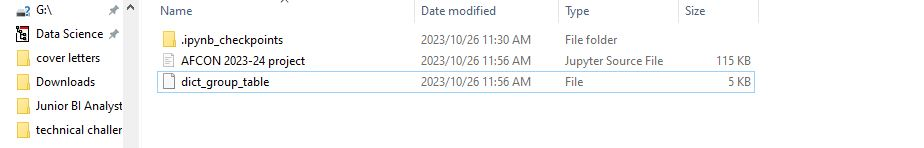

# Scraping historical AFCON results data 

In [103]:
afcon_years = [1957, 1959, 1962, 1963, 1965, 1968, 1970, 1972, 1974, 1976, 1978, 1980, 
               1982, 1984, 1986, 1988, 1990, 1992, 1994, 1996, 1998,2000,2002, 2004, 2006, 
               2008, 2010, 2012, 2013, 2015, 2017, 2019, 2021]

In [104]:
wiki = 'https://en.wikipedia.org/wiki/1974_African_Cup_of_Nations'

# Scraping historical AFCON results data 

In [105]:
response = requests.get(wiki)
wiki_content = response.text
soup = BeautifulSoup(wiki_content, 'lxml') # lxml  parser is responsible for reading the HTML or XML content 

### Scraping the specific Wikipedia site

In [106]:
# I used BeautifulSoup to find all HTML elements with the class 'footballbox' in the parsed HTML content and stored them in the "afcon74_games" variable. 
afcon74_games = soup.find_all('div', class_='footballbox')

### Exctracting match scores for each gameat the 1974 AFCON edition

In [107]:
for game in afcon74_games:
    print(game.find('th', class_ = 'fhome').get_text())
    print(game.find('th', class_ = 'fscore').get_text())
    print(game.find('th', class_ = 'faway').get_text())
    

Egypt 
2–1
 Uganda
Zambia 
1–0
 Ivory Coast
Egypt 
3–1
 Zambia
Ivory Coast 
2–2
 Uganda
Egypt 
2–0
 Ivory Coast
Zambia 
1–0
 Uganda
Zaire 
2–1
 Guinea
Congo 
2–0
 Mauritius
Guinea 
2–1
 Mauritius
Congo 
2–1
 Zaire
Congo 
1–1
 Guinea
Zaire 
4–1
 Mauritius
Egypt 
2–3
 Zaire
Congo 
2–4 (a.e.t.)
 Zambia
Congo 
0–4
 Egypt
Zaire 
2–2 (a.e.t.)
 Zambia
Zaire 
2–0
 Zambia


Now, I shall use the pandas library to manage the match score data that I have extracted.

In [108]:
home = []
score = []
away = []

# Extract information from each game element in afcon74_games
    # - 'home' stores the home team name
    # - 'score' stores the match score
    # - 'away' stores the away team name
for game in afcon74_games:
    #  get_text() is used to extract the home team name, score, and away team name from the HTML element
    home.append(game.find('th', class_ = 'fhome').get_text()) 
    score.append(game.find('th', class_ = 'fscore').get_text())
    away.append(game.find('th', class_ = 'faway').get_text())


In [109]:
dict_afcon74 = {'home':home, 'score':score, 'away': away}

Using the dictionary above, I can use the pandas module to create a DataFrame to use or manipulate my data.

In [110]:
afcon74_df= pd.DataFrame(dict_afcon74) 

For use at a later stage, I will create a column capturing the year of the tournament in my Pandas DataFrame.

In [111]:
afcon74_df['year'] = '1974'

In [112]:
afcon74_df

,home,score,away,year
0,Egypt,2–1,Uganda,1974
1,Zambia,1–0,Ivory Coast,1974
2,Egypt,3–1,Zambia,1974
3,Ivory Coast,2–2,Uganda,1974
4,Egypt,2–0,Ivory Coast,1974
5,Zambia,1–0,Uganda,1974
6,Zaire,2–1,Guinea,1974
7,Congo,2–0,Mauritius,1974
8,Guinea,2–1,Mauritius,1974
9,Congo,2–1,Zaire,1974


I can now easily check the teams that played the 1974 AFCON final as well as the score

In [113]:
afcon74_df.iloc[16]

home      Zaire 
score        2–0
away      Zambia
year        1974
Name: 16, dtype: object

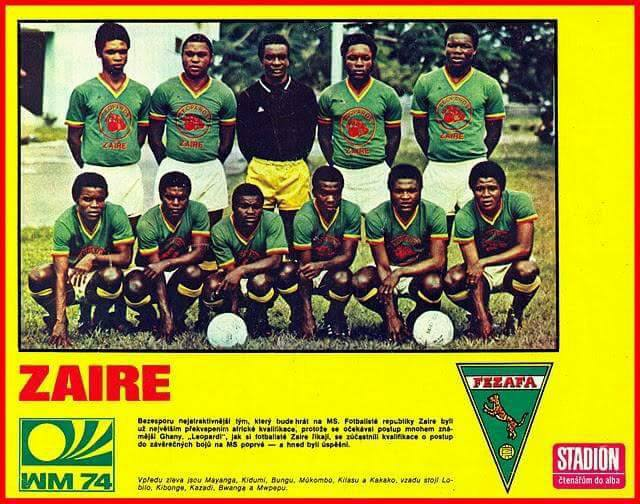

### Setting up a fuunction to retrive results for a specific AFCON year

In [114]:
# List of AFCON tournament years from 1957 to 2021
afcon_years = [1957, 1959, 1962, 1963, 1965, 1968, 1970, 1972, 1974, 1976, 1978, 1980, 
               1982, 1984, 1986, 1988, 1990, 1992, 1994, 1996, 1998,2000,2002, 2004, 2006, 
               2008, 2010, 2012, 2013, 2015, 2017, 2019, 2021]

def get_matches(afcon_year):
    # Generate the Wikipedia URL for a specified AFCON year
    wiki = f'https://en.wikipedia.org/wiki/{afcon_year}_African_Cup_of_Nations'
    # Send an HTTP GET request to the Wikipedia page and retrieve the HTML content
    response = requests.get(wiki)
    wiki_content = response.text
    # Create a BeautifulSoup object for parsing the HTML content using the lxml parser
    soup = BeautifulSoup(wiki_content, 'lxml') # lxml  parser is responsible for reading the HTML or XML content 
    
    # I used BeautifulSoup to find all HTML elements with the class 'footballbox' in the parsed HTML content and stored them in the "afcon74_games" variable. 
    afcon_games = soup.find_all('div', class_='footballbox')
    
    # Initialize empty lists to store data
    home = []
    score = []
    away = []

    # Extract information from each game element in afcon74_games
        # - 'home' stores the home team name
        # - 'score' stores the match score
        # - 'away' stores the away team name
  
    for game in afcon_games:
        #  get_text() is used to extract the home team name, score, and away team name from the HTML element
        home.append(game.find('th', class_ = 'fhome').get_text()) 
        score.append(game.find('th', class_ = 'fscore').get_text())
        away.append(game.find('th', class_ = 'faway').get_text())
    
    # Create a dictionary to structure the extracted data
    dict_afcon = {'home':home, 'score':score, 'away': away}
    
    # Pandas DataFrame is created in order to organise the relevant data
    afcon_df= pd.DataFrame(dict_afcon)
    # 'year' column added to afcon_df DataFrame
    afcon_df['year'] = afcon_year
    # Return tafcon_df containing the extracted data
    return  afcon_df


In [115]:
afcon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Pos     4 non-null      int64 
 1   Team    4 non-null      object
 2   Pld     4 non-null      int64 
 3   W       4 non-null      int64 
 4   D       4 non-null      int64 
 5   L       4 non-null      int64 
 6   GF      4 non-null      int64 
 7   GA      4 non-null      int64 
 8   GD      4 non-null      int64 
 9   Pts     4 non-null      int64 
dtypes: int64(9), object(1)
memory usage: 448.0+ bytes


In [116]:
# Use print function to examine output from my code/function above
print(get_matches('1998'))

             home         score           away  year
0   Burkina Faso            0–1       Cameroon  1998
1        Algeria            0–1         Guinea  1998
2       Cameroon            2–2         Guinea  1998
3   Burkina Faso            2–1        Algeria  1998
4   Burkina Faso            1–0         Guinea  1998
5       Cameroon            2–1        Algeria  1998
6       DR Congo            2–1           Togo  1998
7          Ghana            2–0        Tunisia  1998
8        Tunisia            2–1       DR Congo  1998
9           Togo            2–1          Ghana  1998
10      DR Congo            1–0          Ghana  1998
11       Tunisia            3–1           Togo  1998
12  South Africa            0–0         Angola  1998
13   Ivory Coast            4–3        Namibia  1998
14   Ivory Coast            1–1   South Africa  1998
15        Angola            3–3        Namibia  1998
16   Ivory Coast            5–2         Angola  1998
17  South Africa            4–1        Namibia

As can be seen, the function outputs all the match results from the AFCON tournament of a specified year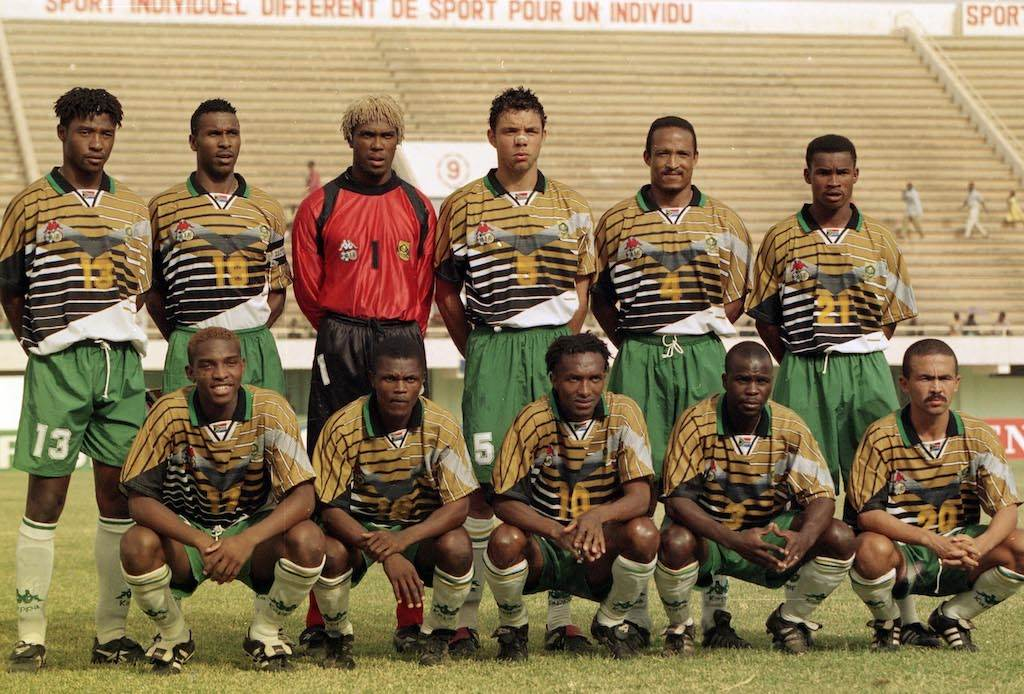

In [117]:
# initialize an empty list all_afcon_data to store DataFrames of each AFCON year.
all_afcon_data = []

for afcon_year in afcon_years:    # loop through each year in the afcon_years list
    afcon_data = get_matches(afcon_year)
    # append each afcon_data DataFrame to the all_afcon_data list
    all_afcon_data.append(afcon_data)

# Concatenate all DataFrames into one
afcon_results_df = pd.concat(all_afcon_data, ignore_index=True) # pandas conctentae function used to combine DFs
# ignore_index=True parameter is used to reset the index of the concatenated Datframe.


In [118]:
# afcon_results_df will contain the combined results of all the tournaments from 1957 to 2021. 
afcon_results_df

,home,score,away,year
0,Sudan,1–2,Egypt,1957
1,Ethiopia,2–0 1,South Africa,1957
2,Egypt,4–0,Ethiopia,1957
3,United Arab Republic,4–0,Ethiopia,1959
4,Sudan,1–0,Ethiopia,1959
...,...,...,...,...
605,Ivory Coast,3–1,Algeria,2015
606,DR Congo,1–3,Ivory Coast,2015
607,Ghana,3–0,Equatorial Guinea,2015
608,DR Congo,0–0,Equatorial Guinea,2015


As can be seen above, the afcon_results_df Dataframe contains 610 rows (games) and 4 columns (home, score, away, and year)

In [119]:
afcon_results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   home    610 non-null    object
 1   score   610 non-null    object
 2   away    610 non-null    object
 3   year    610 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 19.2+ KB


One can also see that there are no null values (empty cells). The 'year' column is an integer, which means one can perform numerical operations at a later stage should they so wish.

In [120]:
afcon_results_df_ex = afcon_results_df
afcon_results_df_ex['score'] = afcon_results_df_ex['score'].str.replace('—', '-')
afcon_results_df_ex.to_csv('afcon_results_ALL2.csv', index=False)



# AFCON 2023 fixtures

In [121]:
df_afcon23_fixtures_til_L16 = pd.read_csv('afcon23_fixtures_group_L16.csv')

In [122]:
df_afcon23_fixtures_til_L16

,home,score,away,Stage,stage,match_label
0,Ivory Coast,v,Guinea-Bissau,KO,Group,Group_M1
1,Nigeria,v,Equatorial Guinea,KO,Group,Group_M2
2,Equatorial Guinea,v,Guinea-Bissau,KO,Group,Group_M3
3,Ivory Coast,v,Nigeria,KO,Group,Group_M4
4,Equatorial Guinea,v,Ivory Coast,KO,Group,Group_M5
5,Guinea-Bissau,v,Nigeria,KO,Group,Group_M6
6,Egypt,v,Mozambique,KO,Group,Group_M7
7,Ghana,v,Cape Verde,KO,Group,Group_M8
8,Egypt,v,Ghana,KO,Group,Group_M9
9,Cape Verde,v,Mozambique,KO,Group,Group_M10


# Cleaning the data

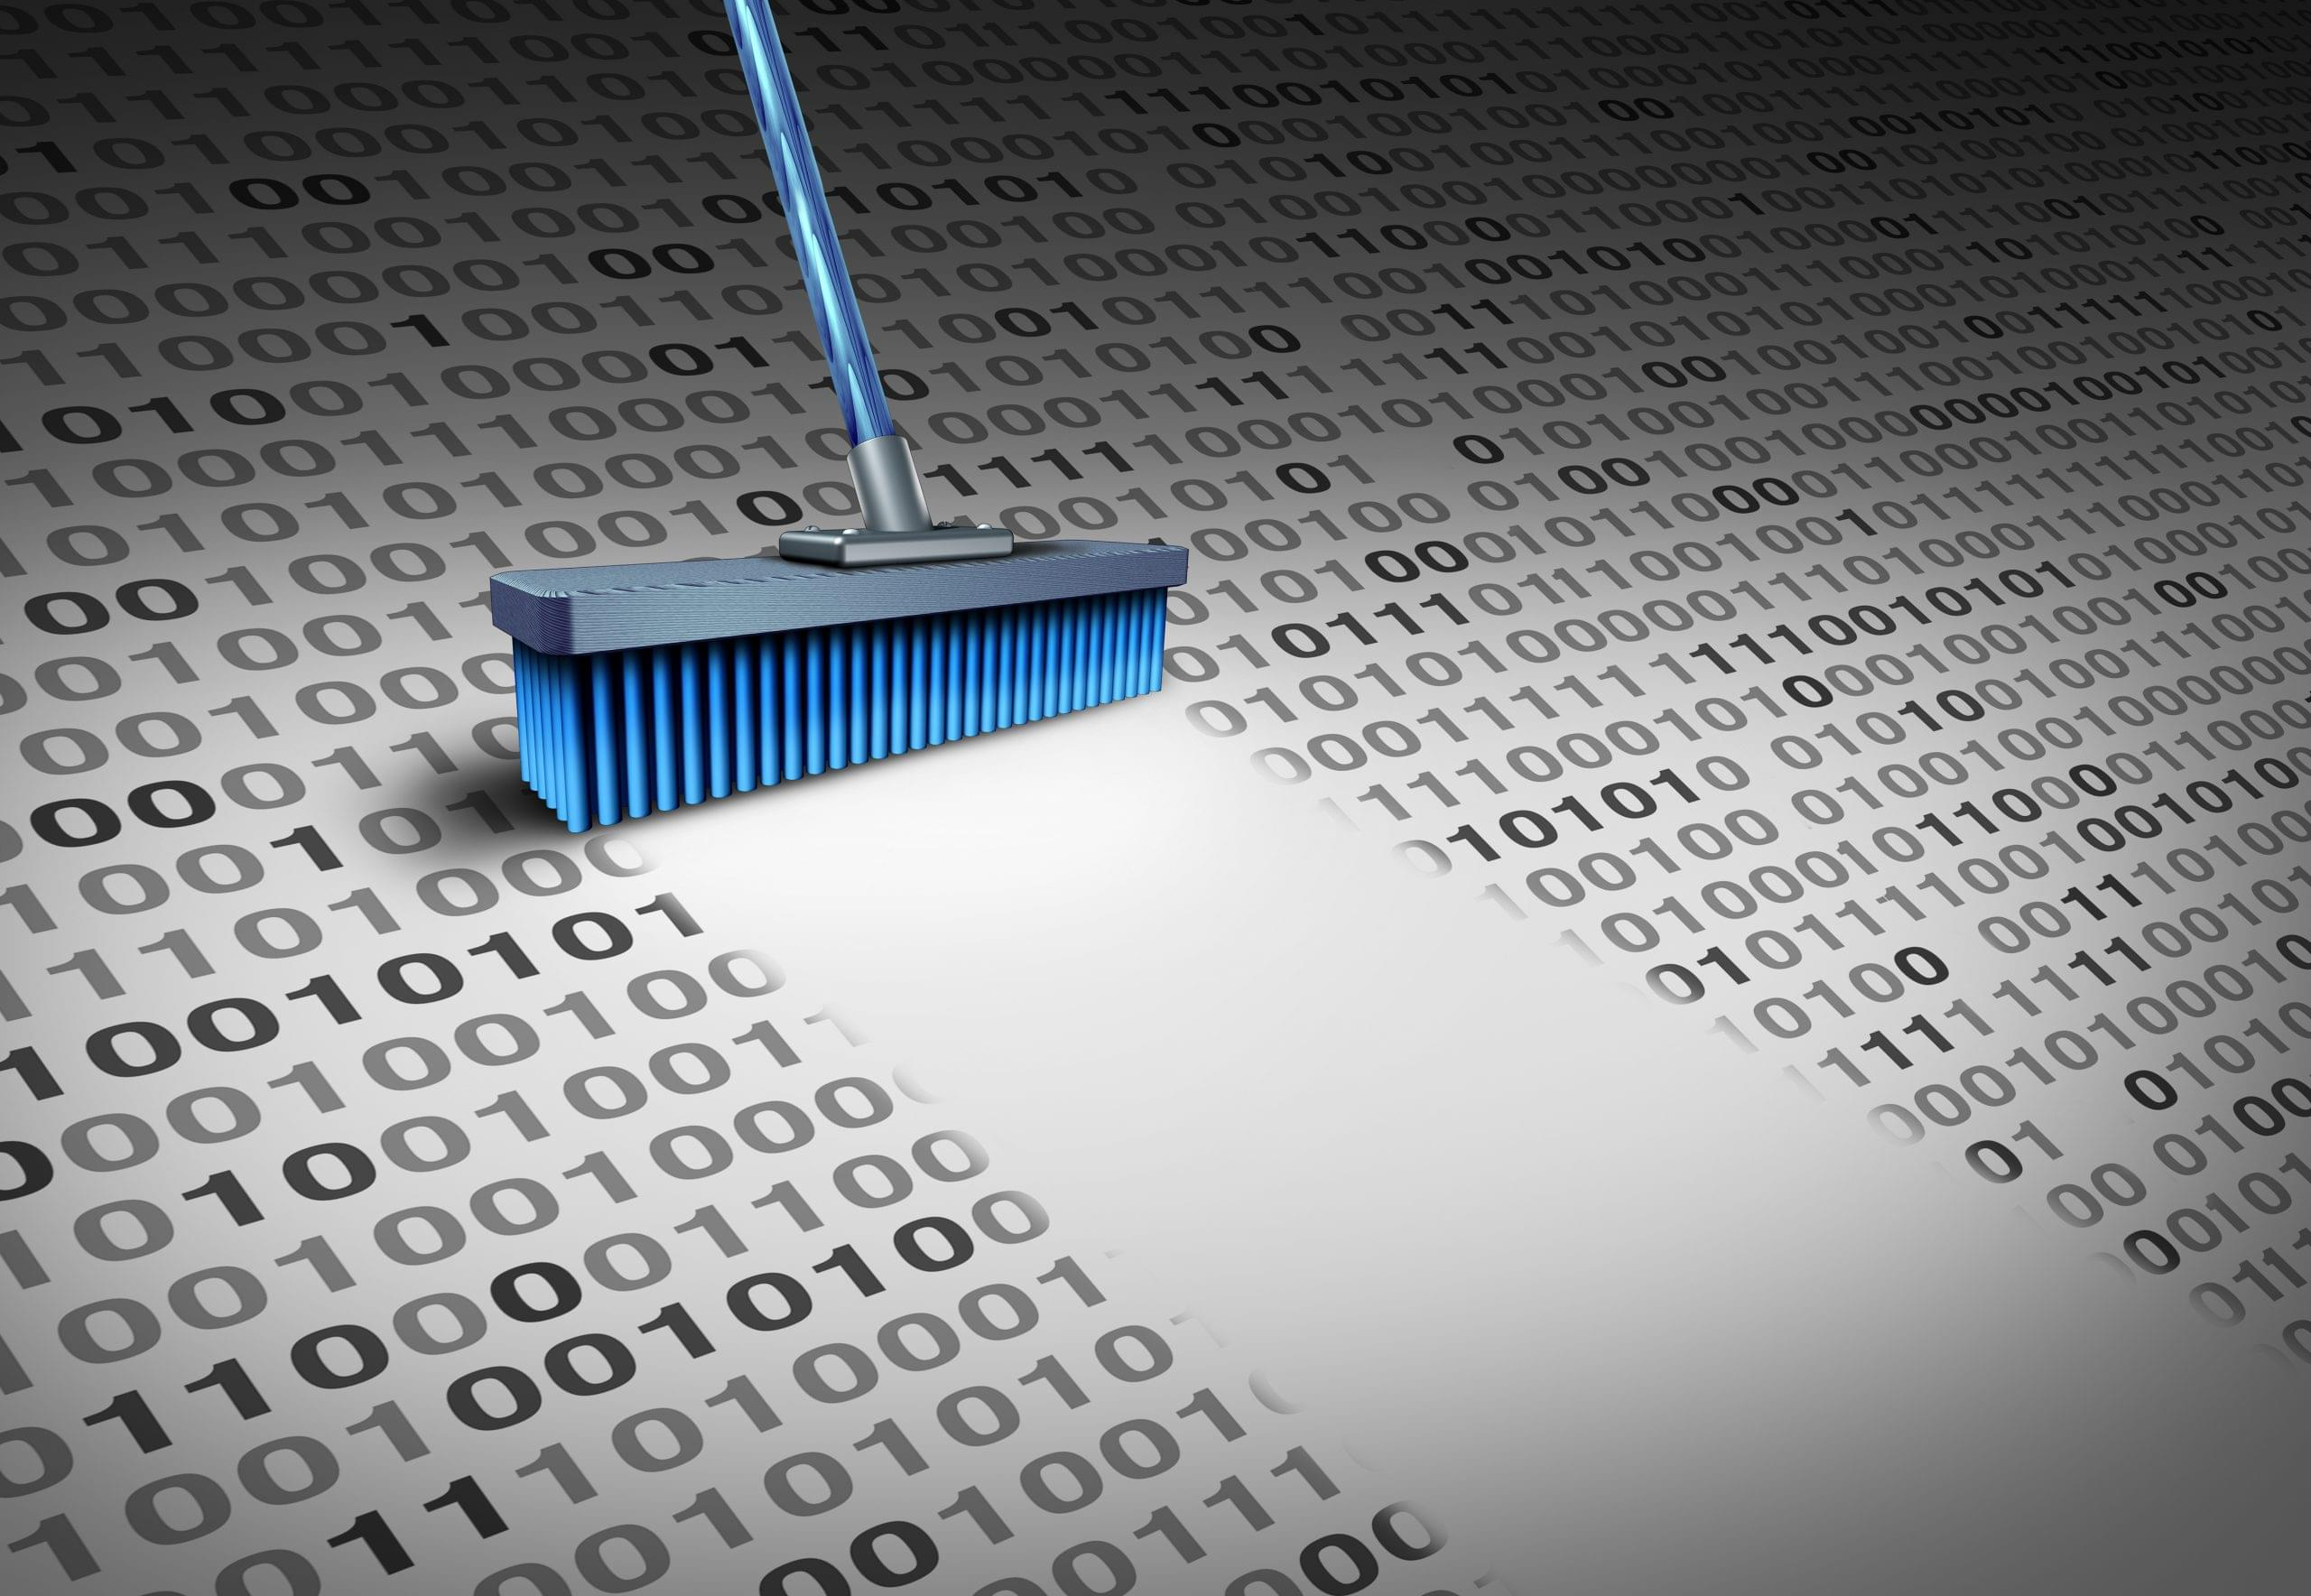

In [ ]:
# afcon_results_df
# df_afcon23_fixtures_til_L16


**Sources**

Zaire NationalTeam image: https://www.facebook.com/InsideZamFoot/posts/afcon-1974-zaire-v-zambiathe-great-kk11-which-lost-to-zaire-in-the-1974-african-/2040803525932050/

Bafana 1998 image: https://www.snl24.com/kickoff/sanews/sa-national-teams/throwback-23-years-since-benni-mccarthy-made-his-bafana-bafana-debut-20200604

Cleaning the data image: https://cdn.technologyadvice.com/wp-content/uploads/2022/06/Data-Cleaning-scaled.jpeg